In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

all_stats = pd.read_csv('../python_project_csv_files/2019-20_pbp.csv', header = [0])

pd.set_option("display.max_columns", None)

In [2]:
older_stats = pd.read_csv('../python_project_csv_files/2018-19_pbp.csv', header = [0])

pd.set_option("display.max_columns", None)

In [3]:
older_stats.fillna('',inplace=True)
older_stats['Play'] = older_stats["VISITORDESCRIPTION"] + older_stats["HOMEDESCRIPTION"]

In [4]:
import re

older_stats['Play'] = older_stats['Play'].apply(lambda row: row if re.findall("\d'",row) != [] else np.nan)
older_stats.dropna(subset=['Play'],inplace=True)

older_stats['ShotDist'] = older_stats['Play'].apply(lambda row: re.findall("\d+'",row)[0][0:2] if len(re.findall("\d+'",row)[0]) == 3 else re.findall("\d+'",row)[0][0:1]).astype(int)

older_stats['ShotOutcome'] = older_stats['Play'].apply(lambda row: 'miss' if 'MISS' in row else 'make')
older_stats['ShotType'] = older_stats['Play'].apply(lambda row: '3PT' if '3PT' in row else '2PT')
older_stats['Team'] = older_stats['PLAYER1_TEAM_ABBREVIATION']
refined_df = older_stats[['Team','ShotType','ShotDist','ShotOutcome']]

#def fg_percent(df):
    

fg_perc = refined_df.groupby(['ShotType','ShotDist']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome'])))
print(fg_perc)
team_fg_perc = refined_df.groupby(['Team','ShotType']).apply(lambda row: (sum(row['ShotOutcome']=='make')/len(row['ShotOutcome']))).reset_index(name='fg_percent')

test = refined_df.groupby('Team').apply(lambda row: (sum((row['ShotOutcome']=='make') & (row['ShotType']=='2PT'))+sum((row['ShotOutcome']=='make') & (row['ShotType']=='3PT')))/len(row['ShotOutcome'])).reset_index(name='fg_percent')
#test['wins'] = [44,56,34,62,19,57,50,30,36,43,37,32,57,46,58,35,17,24,46,42,55,52,41,40,48,24,61,22,39,23]
test['wins'] = [29,42,49,39,22,19,33,54,41,57,53,48,48,37,33,39,60,36,33,17,49,42,51,19,53,39,48,58,50,32]

team_efg_perc = refined_df.groupby('Team').apply(lambda row: (sum((row['ShotOutcome']=='make') & (row['ShotType']=='2PT'))+1.5*sum((row['ShotOutcome']=='make') & (row['ShotType']=='3PT')))/len(row['ShotOutcome'])).reset_index(name='efg_percent')
#team_efg_perc['wins'] = [44,56,34,62,19,57,50,30,36,43,37,32,57,46,58,35,17,24,46,42,55,52,41,40,48,24,61,22,39,23]
team_efg_perc['wins'] = [29,42,49,39,22,19,33,54,41,57,53,48,48,37,33,39,60,36,33,17,49,42,51,19,53,39,48,58,50,32]

#team_fg_perc['attempts'] = refined_df.groupby(['Team']).apply(lambda row: sum(row['ShotType']=='3PT') if row['ShotType'] == '3PT' else sum(row['ShotType']=='2PT'))
#team_fg_perc


fg_perc_3pt = team_fg_perc[team_fg_perc['ShotType'] == '3PT']
#fg_perc_3pt['wins'] = [44,56,34,62,19,57,50,30,36,43,37,32,57,46,58,35,17,24,46,42,55,52,41,40,48,24,61,22,39,23]
fg_perc_3pt['wins'] = [29,42,49,39,22,19,33,54,41,57,53,48,48,37,33,39,60,36,33,17,49,42,51,19,53,39,48,58,50,32]
team_efg_perc

ShotType  ShotDist
2PT       1           0.722048
          2           0.605860
          3           0.455995
          4           0.389383
          5           0.383363
                        ...   
3PT       82          0.000000
          83          0.000000
          84          0.000000
          85          0.000000
          87          0.000000
Length: 87, dtype: float64


<ipython-input-4-92ef38025c22>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg_perc_3pt['wins'] = [29,42,49,39,22,19,33,54,41,57,53,48,48,37,33,39,60,36,33,17,49,42,51,19,53,39,48,58,50,32]


,Team,efg_percent,wins
0,ATL,0.509366,29
1,BKN,0.514304,42
2,BOS,0.531886,49
3,CHA,0.507487,39
4,CHI,0.493040,22
5,CLE,0.496501,19
6,DAL,0.505994,33
7,DEN,0.518575,54
8,DET,0.499625,41
9,GSW,0.558883,57


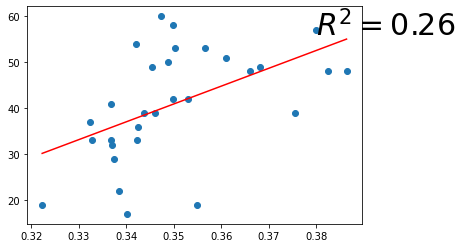

In [5]:
xd = fg_perc_3pt['fg_percent']
yd = fg_perc_3pt['wins']

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')

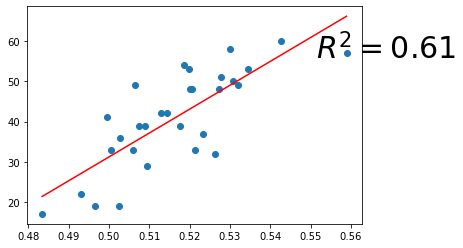

In [6]:
xd = team_efg_perc['efg_percent']
yd = team_efg_perc['wins']

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')

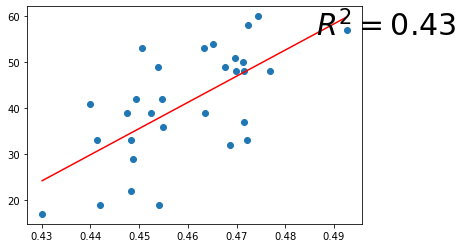

In [7]:
xd = test['fg_percent']
yd = test['wins']

plt.scatter(xd, yd)

# determine best fit line
par = np.polyfit(xd, yd, 1, full=True)

slope=par[0][0]
intercept=par[0][1]
xl = [min(xd), max(xd)]
yl = [slope*xx + intercept  for xx in xl]

# coefficient of determination, plot text
variance = np.var(yd)
residuals = np.var([(slope*xx + intercept - yy)  for xx,yy in zip(xd,yd)])
Rsqr = np.round(1-residuals/variance, decimals=2)
plt.text(.9*max(xd)+.1*min(xd),.9*max(yd)+.1*min(yd),'$R^2 = %0.2f$'% Rsqr, fontsize=30)

plt.plot(xl, yl, '-r')

In [8]:
all_stats

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Assister,Blocker,FoulType,Fouler,Fouled,Rebounder,ReboundType,ViolationPlayer,ViolationType,TimeoutTeam,FreeThrowShooter,FreeThrowOutcome,FreeThrowNum,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,0,TOR,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,0,TOR,NaN,0,L. Ball - balllo01,2-pt jump shot,miss,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,0,TOR,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,2,TOR,NaN,0,D. Favors - favorde01,2-pt layup,make,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,2,TOR,O. Anunoby misses 2-pt layup from 3 ft,0,O. Anunoby - anunoog01,2-pt layup,miss,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,103,MIA,K. Olynyk makes 2-pt layup from 2 ft,90,K. Olynyk - olynyke01,2-pt layup,make,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,106,MIA,NaN,90,D. Howard - howardw01,3-pt jump shot,make,30.0,A. Caruso - carusal01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,106,MIA,S. Hill makes 3-pt jump shot from 29 ft,93,S. Hill - hillso01,3-pt jump shot,make,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,106,MIA,NaN,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
some_stats = all_stats[['GameType','WinningTeam','Quarter','AwayTeam','AwayPlay','HomeTeam','HomePlay','Shooter','ShotType','ShotOutcome','ShotDist']]
some_stats

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,TOR,NaN,NaN,NaN,NaN,NaN
1,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2-pt jump shot,miss,11.0
2,regular,TOR,1,NOP,Offensive rebound by D. Favors,TOR,NaN,NaN,NaN,NaN,NaN
3,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2-pt layup,make,0.0
4,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2-pt layup,miss,3.0
...,...,...,...,...,...,...,...,...,...,...,...
539260,playoff,LAL,4,LAL,NaN,MIA,K. Olynyk makes 2-pt layup from 2 ft,K. Olynyk - olynyke01,2-pt layup,make,2.0
539261,playoff,LAL,4,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,MIA,NaN,D. Howard - howardw01,3-pt jump shot,make,30.0
539262,playoff,LAL,4,LAL,NaN,MIA,S. Hill makes 3-pt jump shot from 29 ft,S. Hill - hillso01,3-pt jump shot,make,29.0
539263,playoff,LAL,4,LAL,End of 4th quarter,MIA,NaN,NaN,NaN,NaN,NaN


In [10]:
shooting = some_stats[some_stats['Shooter'].notna()].reset_index().drop(columns = 'index')
shooting

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2-pt jump shot,miss,11.0
1,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2-pt layup,make,0.0
2,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2-pt layup,miss,3.0
3,regular,TOR,1,NOP,J. Holiday misses 2-pt layup from 8 ft,TOR,NaN,J. Holiday - holidjr01,2-pt layup,miss,8.0
4,regular,TOR,1,NOP,NaN,TOR,K. Lowry misses 3-pt jump shot from 25 ft,K. Lowry - lowryky01,3-pt jump shot,miss,25.0
...,...,...,...,...,...,...,...,...,...,...,...
202392,playoff,LAL,4,LAL,Q. Cook misses 3-pt jump shot from 27 ft,MIA,NaN,Q. Cook - cookqu01,3-pt jump shot,miss,27.0
202393,playoff,LAL,4,LAL,NaN,MIA,K. Nunn misses 3-pt jump shot from 26 ft,K. Nunn - nunnke01,3-pt jump shot,miss,26.0
202394,playoff,LAL,4,LAL,NaN,MIA,K. Olynyk makes 2-pt layup from 2 ft,K. Olynyk - olynyke01,2-pt layup,make,2.0
202395,playoff,LAL,4,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,MIA,NaN,D. Howard - howardw01,3-pt jump shot,make,30.0


In [11]:
two_point_shots = shooting[shooting['ShotType'].str.contains('2')].reset_index().drop(columns = 'index')
two_point_shots.count()[0]
two_point_shots

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2-pt jump shot,miss,11.0
1,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2-pt layup,make,0.0
2,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2-pt layup,miss,3.0
3,regular,TOR,1,NOP,J. Holiday misses 2-pt layup from 8 ft,TOR,NaN,J. Holiday - holidjr01,2-pt layup,miss,8.0
4,regular,TOR,1,NOP,D. Favors misses 2-pt jump shot from 12 ft,TOR,NaN,D. Favors - favorde01,2-pt jump shot,miss,12.0
...,...,...,...,...,...,...,...,...,...,...,...
124048,playoff,LAL,4,LAL,R. Rondo misses 2-pt jump shot from 11 ft,MIA,NaN,R. Rondo - rondora01,2-pt jump shot,miss,11.0
124049,playoff,LAL,4,LAL,L. James makes 2-pt layup from 2 ft,MIA,NaN,L. James - jamesle01,2-pt layup,make,2.0
124050,playoff,LAL,4,LAL,NaN,MIA,K. Olynyk makes 2-pt layup from 3 ft (assist b...,K. Olynyk - olynyke01,2-pt layup,make,3.0
124051,playoff,LAL,4,LAL,NaN,MIA,S. Hill makes 2-pt jump shot from 11 ft (assis...,S. Hill - hillso01,2-pt jump shot,make,11.0


In [12]:
all_shots = shooting[shooting['ShotType'].str.contains('2|3')].reset_index().drop(columns = 'index')

In [13]:
all_shots['ShotType'] = all_shots['ShotType'].apply(lambda row: '3PT' if '3-pt' in row else '2PT')
all_shots.head(5)

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,L. Ball misses 2-pt jump shot from 11 ft,TOR,NaN,L. Ball - balllo01,2PT,miss,11.0
1,regular,TOR,1,NOP,D. Favors makes 2-pt layup at rim,TOR,NaN,D. Favors - favorde01,2PT,make,0.0
2,regular,TOR,1,NOP,NaN,TOR,O. Anunoby misses 2-pt layup from 3 ft,O. Anunoby - anunoog01,2PT,miss,3.0
3,regular,TOR,1,NOP,J. Holiday misses 2-pt layup from 8 ft,TOR,NaN,J. Holiday - holidjr01,2PT,miss,8.0
4,regular,TOR,1,NOP,NaN,TOR,K. Lowry misses 3-pt jump shot from 25 ft,K. Lowry - lowryky01,3PT,miss,25.0


In [14]:
two_point_shots = shooting[shooting['ShotType'].str.contains('2')].reset_index().drop(columns='index')
two_point_shots.count()[0]

124053

In [15]:
two_point_makes = two_point_shots[two_point_shots['ShotOutcome'] == 'make'].reset_index().drop(columns='index')
two_point_makes.count()[0]

65018

In [16]:
three_point_shots = shooting[shooting['ShotType'].str.contains('3')].reset_index().drop(columns='index')
three_point_shots.count()[0]

78344

In [17]:
three_point_makes = three_point_shots[three_point_shots['ShotOutcome'] == 'make'].reset_index().drop(columns='index')
three_point_makes.count()[0]

28061

In [18]:
print(two_point_makes.count()[0]/two_point_shots.count()[0])
print(three_point_makes.count()[0]/three_point_shots.count()[0])
print(three_point_makes.count()[0]/three_point_shots.count()[0]*1.5)

0.5241146929135128
0.3581767589094251
0.5372651383641376


In [19]:
shot_makes = shooting[shooting['ShotOutcome'] == 'make'].reset_index().drop(columns = 'index')
shot_makes_dist = shot_makes['ShotDist']
all_shots_dist = shooting['ShotDist']
shot_makes_dist

0         0.0
1        16.0
2        25.0
3        25.0
4        22.0
         ... 
93074    27.0
93075    11.0
93076     2.0
93077    30.0
93078    29.0
Name: ShotDist, Length: 93079, dtype: float64

(array([4.4900e+03, 1.6809e+04, 1.2942e+04, 5.3690e+03, 2.4140e+03,
        1.7420e+03, 1.7780e+03, 1.5890e+03, 1.5170e+03, 1.3690e+03,
        1.4200e+03, 1.3240e+03, 1.4560e+03, 1.3890e+03, 1.2210e+03,
        1.2180e+03, 1.2500e+03, 1.2350e+03, 1.1930e+03, 1.0850e+03,
        9.3400e+02, 6.3400e+02, 9.6100e+02, 4.3970e+03, 2.7560e+03,
        6.8710e+03, 7.5960e+03, 3.5460e+03, 1.3930e+03, 5.4700e+02,
        2.7000e+02, 1.1200e+02, 5.8000e+01, 3.1000e+01, 1.8000e+01,
        1.9000e+01, 1.6000e+01, 3.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <BarContainer object of 40 artists>)

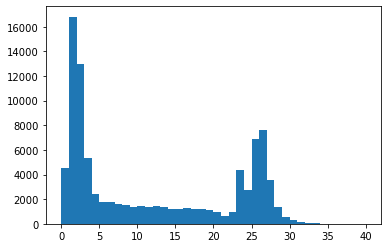

In [20]:
from matplotlib import pyplot as plt
plt.hist(shot_makes_dist, bins = 40, range = (0,40))

(array([6.0390e+03, 2.2860e+04, 2.0852e+04, 1.1235e+04, 6.3460e+03,
        4.7140e+03, 4.5740e+03, 3.9210e+03, 3.7720e+03, 3.3660e+03,
        3.4260e+03, 3.2770e+03, 3.3880e+03, 3.2660e+03, 2.9360e+03,
        2.9120e+03, 3.0360e+03, 2.9460e+03, 2.8870e+03, 2.6240e+03,
        2.3330e+03, 1.6150e+03, 2.5410e+03, 1.1191e+04, 7.3890e+03,
        1.9050e+04, 2.1522e+04, 1.0120e+04, 4.1190e+03, 1.6660e+03,
        7.8400e+02, 3.7300e+02, 1.9500e+02, 1.0600e+02, 8.6000e+01,
        6.6000e+01, 5.5000e+01, 3.0000e+01, 1.9000e+01, 4.4000e+01]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40.]),
 <BarContainer object of 40 artists>)

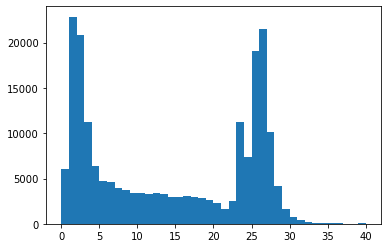

In [21]:
plt.hist(all_shots_dist, bins = 40, range = (0,40))

In [22]:
#plot field goal percentage at each distance from the basket.
#Even better, plot EFG % at each distance - one plot for 2-pts and one plot for 3-pts
#Overlay them on each other?

In [23]:

two_point_shots = shooting[shooting['ShotType'].str.contains('2')].reset_index().drop(columns = 'index')
#two_point_makes = two_point_shots[two_point_shots['ShotOutcome'] == 'make'].reset_index().drop(columns='index')
#shot_makes_dist = shot_makes['ShotDist']
two_points_grouped = two_point_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count()
makes = []
misses = []
total = []
for i in range(25):
    makes.append(two_points_grouped[i][0])
    misses.append(two_points_grouped[i][1])
    total.append(two_points_grouped[i][0] + two_points_grouped[i][1])

FG = [makes[x]/total[x] for x in range(len(makes))]

#three_point_shots.groupby(['ShotDist','ShotOutcome'])

<BarContainer object of 25 artists>

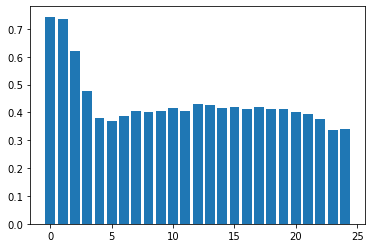

In [24]:
plt.bar(list(range(25)),FG)

In [25]:
three_point_shots = three_point_shots.loc[(three_point_shots['ShotDist'] >= 22) & (three_point_shots['ShotDist'] <= 45)]
three_point_shots

,GameType,WinningTeam,Quarter,AwayTeam,AwayPlay,HomeTeam,HomePlay,Shooter,ShotType,ShotOutcome,ShotDist
0,regular,TOR,1,NOP,NaN,TOR,K. Lowry misses 3-pt jump shot from 25 ft,K. Lowry - lowryky01,3-pt jump shot,miss,25.0
1,regular,TOR,1,NOP,NaN,TOR,O. Anunoby makes 3-pt jump shot from 25 ft (as...,O. Anunoby - anunoog01,3-pt jump shot,make,25.0
2,regular,TOR,1,NOP,L. Ball makes 3-pt jump shot from 25 ft (assis...,TOR,NaN,L. Ball - balllo01,3-pt jump shot,make,25.0
3,regular,TOR,1,NOP,J. Holiday misses 3-pt jump shot from 26 ft,TOR,NaN,J. Holiday - holidjr01,3-pt jump shot,miss,26.0
4,regular,TOR,1,NOP,B. Ingram makes 3-pt jump shot from 22 ft (ass...,TOR,NaN,B. Ingram - ingrabr01,3-pt jump shot,make,22.0
...,...,...,...,...,...,...,...,...,...,...,...
78339,playoff,LAL,4,LAL,J. Dudley misses 3-pt jump shot from 26 ft,MIA,NaN,J. Dudley - dudleja01,3-pt jump shot,miss,26.0
78340,playoff,LAL,4,LAL,Q. Cook misses 3-pt jump shot from 27 ft,MIA,NaN,Q. Cook - cookqu01,3-pt jump shot,miss,27.0
78341,playoff,LAL,4,LAL,NaN,MIA,K. Nunn misses 3-pt jump shot from 26 ft,K. Nunn - nunnke01,3-pt jump shot,miss,26.0
78342,playoff,LAL,4,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,MIA,NaN,D. Howard - howardw01,3-pt jump shot,make,30.0


In [26]:
two_point_shots = two_point_shots.loc[two_point_shots['ShotDist'] <= 24]
fg_percent = pd.DataFrame(two_point_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count().groupby('ShotDist').apply(lambda x: x/sum(x))).rename(columns={'ShotOutcome':'fg_percent'})
fg_percent = fg_percent[fg_percent.index.get_level_values('ShotOutcome') == 'make']
fg_percent = fg_percent.reset_index().drop(columns = 'ShotOutcome')

<BarContainer object of 25 artists>

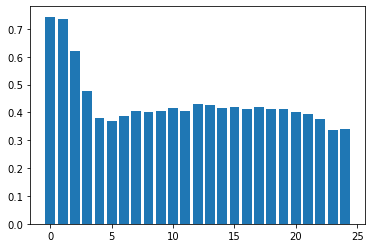

In [27]:
plt.bar(fg_percent['ShotDist'],fg_percent['fg_percent'])

In [28]:
three_point_shots = three_point_shots.loc[(three_point_shots['ShotDist'] >= 22) & (three_point_shots['ShotDist'] <= 40)]
fg_percent = pd.DataFrame(three_point_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count().groupby('ShotDist').apply(lambda x: x/sum(x))).rename(columns={'ShotOutcome':'fg_percent'})
#fg_percent[fg_percent.index.contains('make')]
fg_percent = fg_percent[fg_percent.index.get_level_values('ShotOutcome') == 'make']
fg_percent = fg_percent.reset_index().drop(columns = 'ShotOutcome')
fg_percent['efg_percent'] = (fg_percent['fg_percent'] * 1.5)

<BarContainer object of 18 artists>

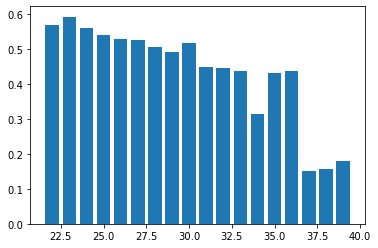

In [29]:
plt.bar(fg_percent['ShotDist'],fg_percent['efg_percent'])

In [30]:
all_shots = all_shots.loc[all_shots['ShotDist'] <= 40]
fg_percent = pd.DataFrame(all_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count().groupby('ShotDist').apply(lambda x: x/sum(x))).rename(columns={'ShotOutcome':'fg_percent'})
fg_percent = fg_percent[fg_percent.index.get_level_values('ShotOutcome') == 'make']
fg_percent = fg_percent.reset_index().drop(columns = 'ShotOutcome')

<BarContainer object of 40 artists>

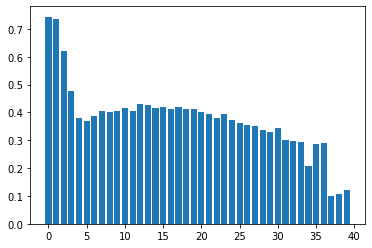

In [31]:
plt.bar(fg_percent['ShotDist'],fg_percent['fg_percent'])